# Week 5: Streamlining Code

Today, we will: 
- Extract data from CSV to create a `geopandas.GeoDataFrame`
- Do more customizations for maps and matplotlib figures
- Go over strategies to streamline code

In [2]:
import os

import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype

import geopandas as gpd

import matplotlib.pyplot as plt

# Set up display options when looking at data frames
pd.set_option("display.max.columns", None)


In [3]:
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv' ## CSV
power_plants = pd.read_csv(URL)
power_plants.head()

# Drop first column 
power_plants = power_plants.drop(columns = "Unnamed: 0")


In [4]:
# Import states data
fp = os.path.join("data",'data 2','tl_2022_us_state','tl_2022_us_state.shp')
states = gpd.read_file(fp)

# Simplify column names
states.columns= states.columns.str.lower()
states.head(3)

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


## CSV to geopandas.GeoDataFrame
The power plants file is a CSV. Unlike shapefiles, `geopandas` don't have a way to extract a geometry column from CSV.So, we need to specify this manually. 

We will use latitude and longitude columns in the CSV, then indicate the location of the power plants in NAD83 CRS. 

In [5]:
# Create points from latitiude and longitude
points = gpd.points_from_xy(power_plants.longitude, 
                   power_plants.latitude)

# Create at the geodataframe

In [6]:
power_plants = gpd.GeoDataFrame(power_plants, 
                 geometry = points, # specify geometry column
                 crs = "EPSG:4269")

<Axes: >

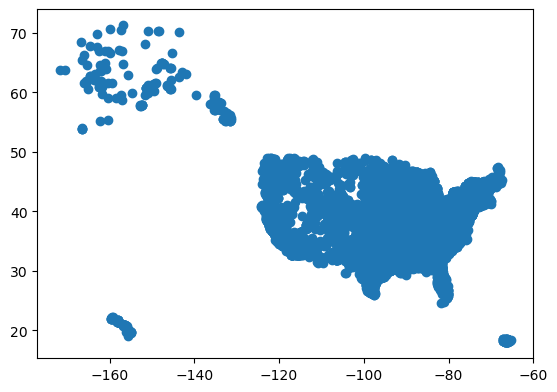

In [7]:
power_plants.plot()

## f-strings 
We have printed variables using string concatenation inside `print()` writing commas between every string and variable we want to print.

In [8]:
print(f"Hello world")

# Example: Explore more about CRS 
print(f"Ellipsoid: {power_plants.crs.ellipsoid}")
print(f"Datum: {power_plants.crs.datum}")

# Another example 
print(f"{'Is the CRS geographic?': <25}{power_plants.crs.is_geographic}")

Hello world
Ellipsoid: GRS 1980
Datum: North American Datum 1983
Is the CRS geographic?   True


## Explore the TIGER shapefile

In [9]:
states.tail()

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
51,1,1,25,00606926,25,MA,Massachusetts,00,G4000,A,20204341720,7130708927,+42.1565196,-071.4895915,"POLYGON ((-71.25515 42.73655, -71.25510 42.736..."
52,3,5,51,01779803,51,VA,Virginia,00,G4000,A,102258178227,8528072639,+37.5222512,-078.6681938,"POLYGON ((-76.49150 36.55065, -76.49388 36.550..."
53,3,5,11,01702382,11,DC,District of Columbia,00,G4000,A,158316184,18709787,+38.9042474,-077.0165167,"POLYGON ((-77.11975 38.93435, -77.11886 38.935..."
54,2,4,19,01779785,19,IA,Iowa,00,G4000,A,144659596400,1086089872,+42.0700243,-093.4933473,"POLYGON ((-95.86095 43.50004, -95.85979 43.500..."
55,4,8,04,01779777,04,AZ,Arizona,00,G4000,A,294365853885,853990728,+34.2039362,-111.6063449,"POLYGON ((-110.75069 37.00301, -110.74193 37.0..."


EPSG:4269


<Axes: >

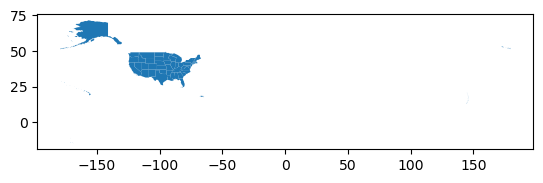

In [10]:
print(states.crs)
states.plot()

## for loops 
Example: It can be easier to work with codes as numbers instead of strings. Update the corresponding columnsin the states geo.DataFrame.

In [11]:
print(f"Region is string type? {is_string_dtype(states['region'])}")
print(f"Division is string type? {is_string_dtype(states['division'])}")
print(f"Statefp is string type? {is_string_dtype(states['statefp'])}")

Region is string type? True
Division is string type? True
Statefp is string type? True


In [14]:
# Use a for loop instead of copy-pasting individually 
code_cols = ["region","division", "statefp"]
for col in code_cols:
    #print(cols) 
    print(f"{col} is string type? {is_string_dtype(states[col])}")


region is string type? True
division is string type? True
statefp is string type? True


**DRY code** = Don't repeat youself 
This is a code programming principle to reduce redundancy and consolidation. 

If this is repeated more than twice, then we would likely need a for loop. 

## `assert`
`assert` does nothing if the expression next to it evaluates to True and it raises an "AssertionError" exception and stops tour code from running further if not.

In [15]:
# Raise error if statement is false 
assert 2+2 == 3

AssertionError: 

# Update code columns into integers
# Workflow for updating the data type of code columns to be integers. 
for each column in code_columns: 

    convert column to numeric 
    
    check if column is numeric using assert

In [16]:
for column in code_cols: 
    states[column] = states[column].astype("int")
    assert is_numeric_dtype(states[column])


## Data selection
For this lesson, we want to use only data for the contiguous US. The data covers a bigger extension:




<Axes: >

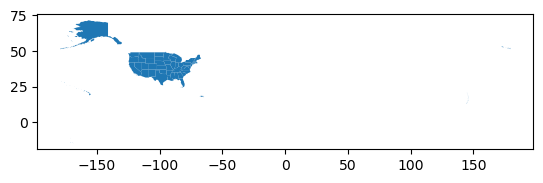

In [17]:
states.plot()

#### Check-in: 
1. What are the unique values for region, division, or state codes in the data? 
2. Which codes should we select to keep states in the contiguous US?

In [38]:
## Unique values 
states.head()
#states[["region", "division", "stusps"]].nunique()
#states["division"].unique()
#states["stusps"].unique()
print(f"Region: {states['region'].unique()}, Divisions: {states['division'].unique()}, States: {states['stusps'].unique()}")


Region: [3 2 1 4 9], Divisions: [5 3 4 1 8 9 2 7 6 0], States: ['WV' 'FL' 'IL' 'MN' 'MD' 'RI' 'ID' 'NH' 'NC' 'VT' 'CT' 'DE' 'NM' 'CA'
 'NJ' 'WI' 'OR' 'NE' 'PA' 'WA' 'LA' 'GA' 'AL' 'UT' 'OH' 'TX' 'CO' 'SC'
 'OK' 'TN' 'WY' 'HI' 'ND' 'KY' 'VI' 'MP' 'GU' 'ME' 'NY' 'NV' 'AK' 'AS'
 'MI' 'AR' 'MS' 'MO' 'MT' 'KS' 'IN' 'PR' 'SD' 'MA' 'VA' 'DC' 'IA' 'AZ']


<Axes: >

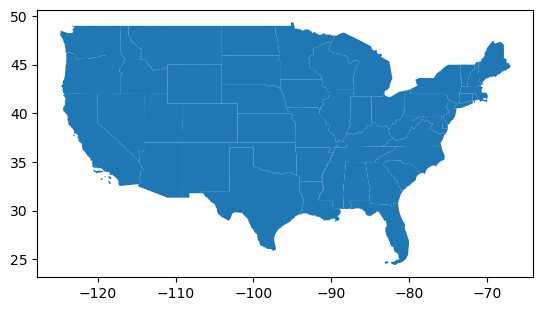

In [ ]:
## What codes to select
# Remove region 9 or division 0 
cont = states[(states["region"] != 9) & (~states["statefp"].isin([2,15]))]
cont.plot()

### ~ is used to negate a statement in Python

#### Check-in 
- Select the data in `power_plants` data frame for the contigiuous US States

<Axes: >

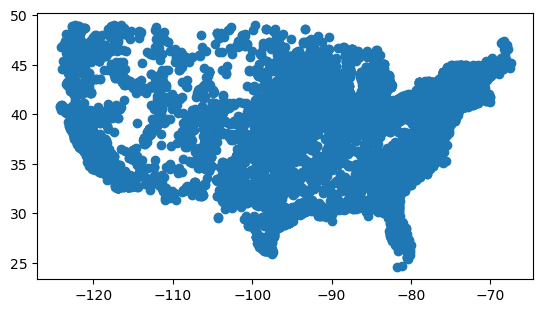

In [57]:
# Select contiguous US states
power_plants.head()
power_plants.state.unique()
power_plants_cont = power_plants[(~power_plants["state"].isin(["Hawaii", "Alaska", "nan", "994.4", "District of Colombia", "Puerto Rico"]))]
power_plants_cont.state.unique()
power_plants_cont.plot()


## Plotting 
Before plotting data, we need to make sure the objects are in the same CRS. 

In [58]:
power_plants_cont.crs == power_plants.crs

True

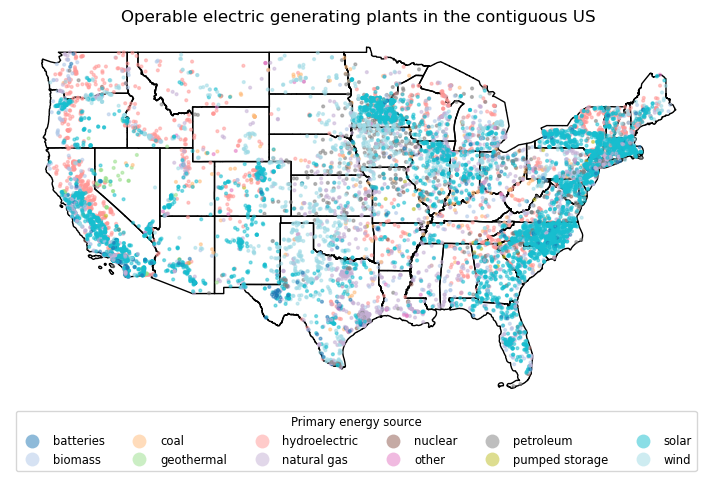

In [69]:
fig, ax = plt.subplots(figsize = (9,5)) # Update figure size

# Remove the axis for a cleaner map
ax.axis("off")

# Title
ax.set_title("Operable electric generating plants in the contiguous US")
cont.plot(ax = ax, color = "none")

power_plants_cont.plot(
    ax = ax, 
    column = "primsource", 
    legend = True, 
    markersize= 4, 
    cmap = "tab20", 
    alpha = .5, 
    legend_kwds = {
        "title": "Primary energy source", 
        "title_fontsize": "small",
        "fontsize": "small", 
        "loc": "upper left", 
        "bbox_to_anchor": (0,0), 
        "ncol":6
})

plt.show()

##  `for` with `zip`
Often, we need to iterate simultaneously over two lists (or iterables). 
`zip()` is a Python function that allows you to combine two lists so that you can iterate over their elements in pairs. When used is a for loop, it allows for you to process elements in a list.

In [71]:
# Iterate over a single list 
numbers = [1,2,3]
for num in numbers:
    print(num+1)

2
3
4


In [72]:
# Iterate over two lists in pairs using zip()
letters = ["a","b","c"]
for num, letter in zip(numbers, letters): 
    print(num+1, letter)

2 a
3 b
4 c


A common situation when code repeats is when you create subplots. 

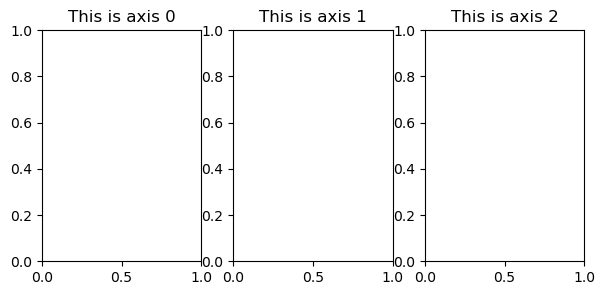

In [77]:
fig, axes = plt.subplots(nrows = 1, ncols =3 , figsize = (7,3))
axes[0].set_title("This is axis 0")
axes[1].set_title("This is axis 1")
axes[2].set_title("This is axis 2")

plt.show()


#### Check-in: 
- Create a for loop using `zip()` to set the title for each subplot.

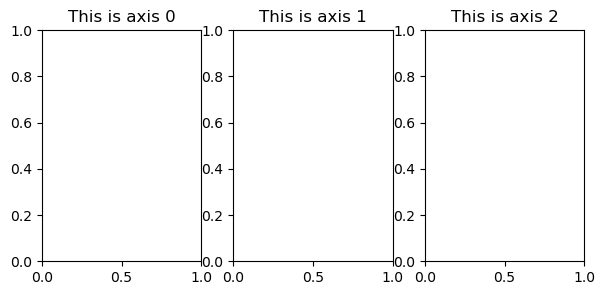

In [78]:
fig, axes = plt.subplots(nrows = 1, ncols =3 , figsize = (7,3))

for ax, i in zip(axes, [0,1,2]): 
    ax.set_title(f"This is axis {i}")

- Select the power plants in California in a variable named ca_power_plants.

- Create a list named top_sources with California’s top 3 electric primary sources.

- Isolate the California state boundary in a variable named ca_boundary.

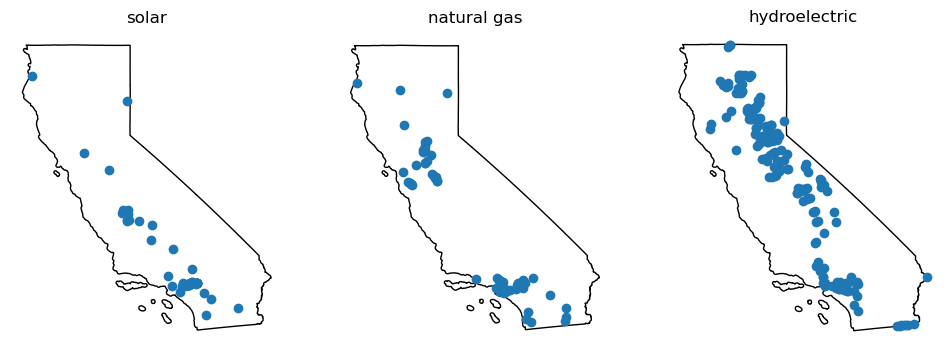

In [151]:
# Select power plants in California 
power_plants_ca = power_plants[power_plants["state"] == "California"]
#power_plants_ca.info()
# Creat a list named top_sources with top 3 electri primary sources
power_plants_ca = power_plants_ca[power_plants_ca["sector_name"] == "Electric Utility"]
power_plants_ca.primsource.unique()
top_sources = ["solar", "natural gas", "hydroelectric"]

# 
#ca_boundary = power_plants_ca["geometry"]
ca_boundary = states[states["stusps"] == "CA"]
#ca_boundary.plot()

#ca_boundary = power_plants_ca["geometry"]
#ca_boundary.info()
# Recreate the plots with a for loop 
fig, axes = plt.subplots(nrows=1, ncols = 3, figsize = (12,6))

for ax, i in zip(axes, top_sources): 
    ax.set_title(i)
    ax.axis("off")
    ca_boundary.plot(ax= ax, color = "none", 
                     edgecolor = "black")
    
    power_plants_ca[power_plants_ca["primsource"] == i].plot(ax=ax)


